The dataset I chose is the affairs dataset that comes with Statsmodels. It was derived
from a survey of women in 1974 by Redbook magazine, in which married women were
asked about their participation in extramarital affairs. More information about the study
is available in a 1978 paper from the Journal of Political Economy.

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
data = sm.datasets.fair.load_pandas().data

In [6]:
data['affair']=(data.affairs>0).astype(int)

In [10]:
data.groupby("affair").mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [12]:
data.groupby("rate_marriage").mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


Text(0,0.5,'Frequency')

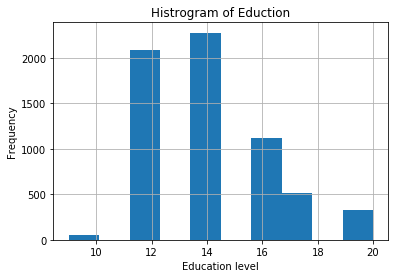

In [21]:
#show plot in notebook
%matplotlib inline
#histogram of education
data.educ.hist()
plt.title("Histrogram of Eduction")
plt.xlabel("Education level")
plt.ylabel("Frequency")

Text(0,0.5,'Frequency')

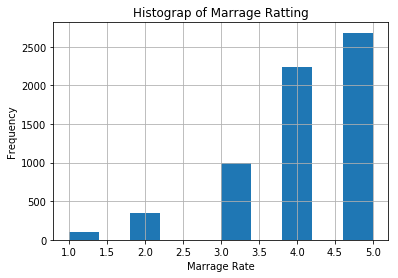

In [23]:
#Histogram of rate_marrage
data.rate_marriage.hist()
plt.title("Histograp of Marrage Ratting")
plt.xlabel("Marrage Rate")
plt.ylabel("Frequency")

Text(0,0.5,'Frequency')

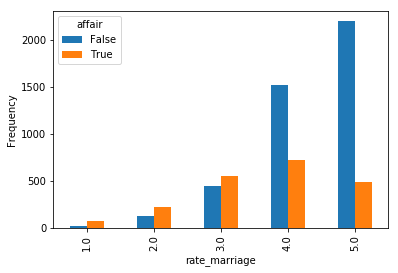

In [25]:
#barplot of marriage ratting by groupby()
pd.crosstab(data.rate_marriage,data.affair.astype(bool)).plot(kind="bar")
plt.ylabel("Frequency")

Text(0,0.5,'Percentage')

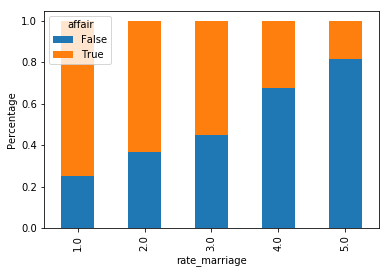

In [28]:
affair_year_married=pd.crosstab(data.rate_marriage,data.affair.astype(bool))
affair_year_married.div(affair_year_married.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True)
plt.ylabel("Percentage")

In [45]:
y,X=dmatrices('affair ~ rate_marriage + age + yrs_married + children +religious + educ + C(occupation) + C(occupation_husb)',data,return_type="dataframe")

print(X.columns)

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')


In [46]:
help(dmatrices)

Help on function dmatrices in module patsy.highlevel:

dmatrices(formula_like, data={}, eval_env=0, NA_action='drop', return_type='matrix')
    Construct two design matrices given a formula_like and data.
    
    This function is identical to :func:`dmatrix`, except that it requires
    (and returns) two matrices instead of one. By convention, the first matrix
    is the "outcome" or "y" data, and the second is the "predictor" or "x"
    data.
    
    See :func:`dmatrix` for details.



In [50]:
#fix columns name

X=X.rename(columns={'C(occupation)[T.2.0]':'occ_2',
                   'C(occupation)[T.3.0]':'occ_3',
                   'C(occupation)[T.4.0]':'occ_4',
                   'C(occupation)[T.5.0]':'occ_5',
                   'C(occupation)[T.6.0]':'occ_6',
                   'C(occupation_husb)[T.2.0]':'occ_hub_2',
                   'C(occupation_husb)[T.3.0]':'occ_hub_3',
                   'C(occupation_husb)[T.4.0]':'occ_hub_4',
                   'C(occupation_husb)[T.5.0]':'occ_hub_5',
                   'C(occupation_husb)[T.6.0]':'occ_hub_6'})

In [51]:
y=np.ravel(y)

In [54]:
Model=LogisticRegression()
Model=Model.fit(X,y)
Model.score(X,y)

0.7258875274897895

In [55]:
y.mean()

0.3224945020420987

In [58]:
#examine the coefficient
pd.DataFrame(list(zip(X.columns,np.transpose(Model.coef_))))

,0,1
0,Intercept,[1.489835891324933]
1,occ_2,[0.18806639024440983]
2,occ_3,[0.4989478668156914]
3,occ_4,[0.25066856498524825]
4,occ_5,[0.8390080648117001]
5,occ_6,[0.8339084337443315]
6,occ_hub_2,[0.1906359445867889]
7,occ_hub_3,[0.2978327129263421]
8,occ_hub_4,[0.1614088540760616]
9,occ_hub_5,[0.18777091388972483]


In [64]:
#evaluate the model by splitting into train and test data
X_train, x_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=0)
Model2=LogisticRegression()
Model2=Model2.fit(X_train,y_train)

In [70]:
predicted=Model2.predict(x_test)
print(predicted)

[1. 0. 0. ... 0. 0. 0.]


In [72]:
#generate class probility
probs=Model2.predict_proba(x_test)
print(probs)

[[0.3514634  0.6485366 ]
 [0.90955084 0.09044916]
 [0.72567333 0.27432667]
 ...
 [0.55727385 0.44272615]
 [0.81207043 0.18792957]
 [0.74734601 0.25265399]]


In [75]:
#generate evaluation metrics
print(metrics.accuracy_score(y_test,predicted))
print(metrics.roc_auc_score(y_test,probs[:,1]))

0.7298429319371728
0.745950606950631


In [76]:
print(metrics.confusion_matrix(y_test,predicted))
print(metrics.classification_report(y_test,predicted))

[[1169  134]
 [ 382  225]]
             precision    recall  f1-score   support

        0.0       0.75      0.90      0.82      1303
        1.0       0.63      0.37      0.47       607

avg / total       0.71      0.73      0.71      1910



In [79]:
#evaluate the model using 10 fold cross-validation
scores=cross_val_score(LogisticRegression(),X,y,scoring='accuracy',cv=10)
print(scores)
print(scores.mean())

[0.72100313 0.70219436 0.73824451 0.70597484 0.70597484 0.72955975
 0.7327044  0.70440252 0.75157233 0.75      ]
0.7241630685514876
